In [1]:
import glob
import pandas as pd
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [2]:
# Read and examine metadata
raw_data = pd.read_csv('../input/covid19-ct-scans/metadata.csv')
raw_data.sample(5)

,ct_scan,lung_mask,infection_mask,lung_and_infection_mask
6,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...
13,../input/covid19-ct-scans/ct_scans/radiopaedia...,../input/covid19-ct-scans/lung_mask/radiopaedi...,../input/covid19-ct-scans/infection_mask/radio...,../input/covid19-ct-scans/lung_and_infection_m...
5,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...
16,../input/covid19-ct-scans/ct_scans/radiopaedia...,../input/covid19-ct-scans/lung_mask/radiopaedi...,../input/covid19-ct-scans/infection_mask/radio...,../input/covid19-ct-scans/lung_and_infection_m...
0,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...


In [3]:
# images were rotated in the source, so we'll add np.rot90 to account for that.
def read_nii(filepath):
    '''
    Reads .nii file and returns pixel array
    '''
    ct_scan = nib.load(filepath)
    array   = ct_scan.get_fdata()
    array   = np.rot90(np.array(array))
    return(array)

In [4]:
# Read sample
sample_ct   = read_nii(raw_data.loc[0,'ct_scan'])
sample_lung = read_nii(raw_data.loc[0,'lung_mask'])
sample_infe = read_nii(raw_data.loc[0,'infection_mask'])
sample_all  = read_nii(raw_data.loc[0,'lung_and_infection_mask'])

In [5]:
# Note that 512x512 is the common resolution for ct images, also there are 301 slices in this ct scan.
sample_ct.shape

(512, 512, 301)

In [6]:
def plot_sample(array_list, color_map = 'nipy_spectral'):
    '''
    Plots and a slice with all available annotations
    '''
    fig = plt.figure(figsize=(18,15))

    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original Image')

    plt.subplot(1,4,2)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Lung Mask')

    plt.subplot(1,4,3)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[2], alpha=0.5, cmap=color_map)
    plt.title('Infection Mask')

    plt.subplot(1,4,4)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[3], alpha=0.5, cmap=color_map)
    plt.title('Lung and Infection Mask')

    plt.show()

There are 3 annotations available:

* Lung Segmentation (contains different values to account for left and right lung)
* Infection Segmentation (segmentation of radiological findings that could be COVID)
* Lung + Infection (for the sake of making it simplier)

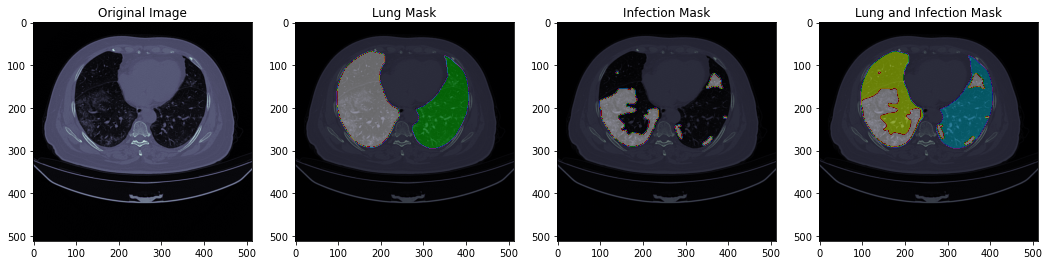

In [7]:
# Examine one slice of a ct scan and its annotations
plot_sample([sample_ct[...,120], sample_lung[...,120], sample_infe[...,120], sample_all[...,120]])

That's an example from a single slice, lets do the same for multiple slices in the same exam.

In [15]:
def bulk_plot_sample(array_list, index_list):
    '''
    Plots multiple slices, wrapper of plot_sample
    '''
    for index_value in index_list:
        plot_sample([array_list[0][...,index_value], array_list[1][...,index_value], array_list[2][...,index_value], array_list[3][...,index_value]])

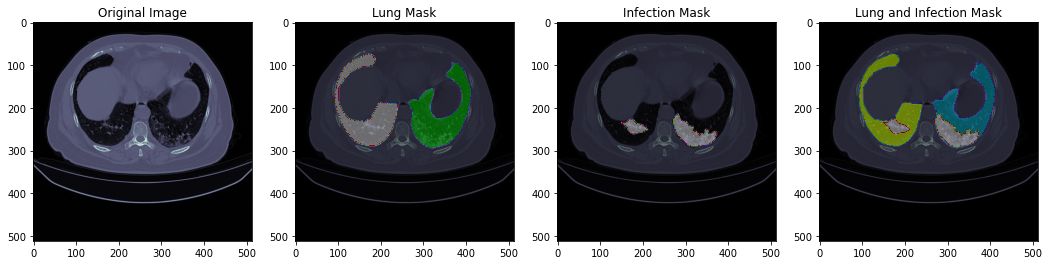

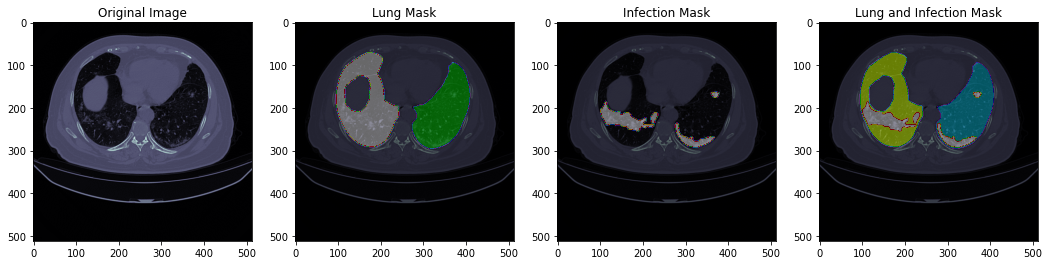

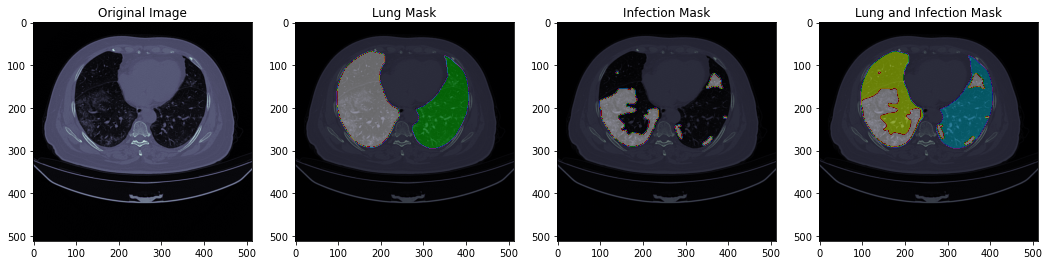

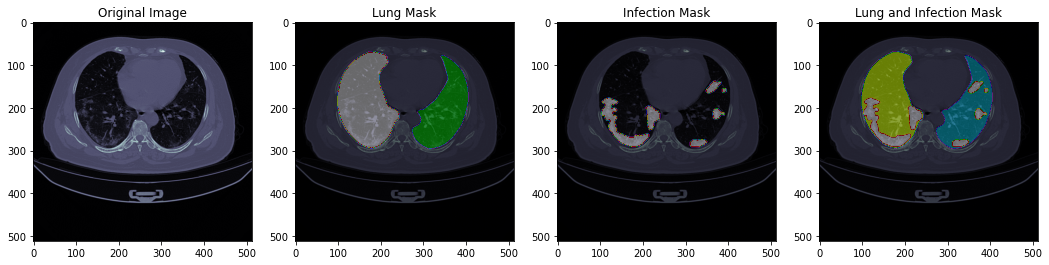

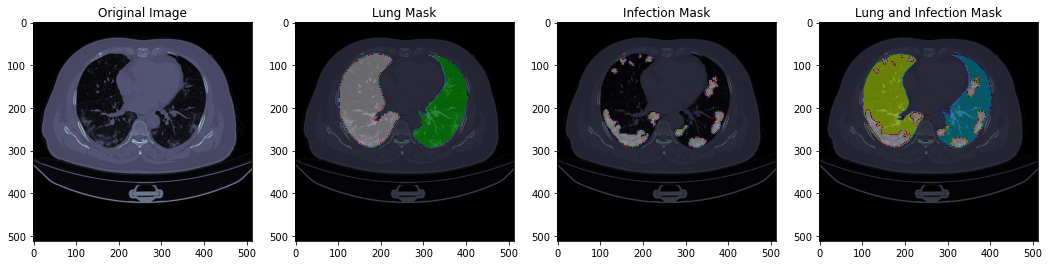

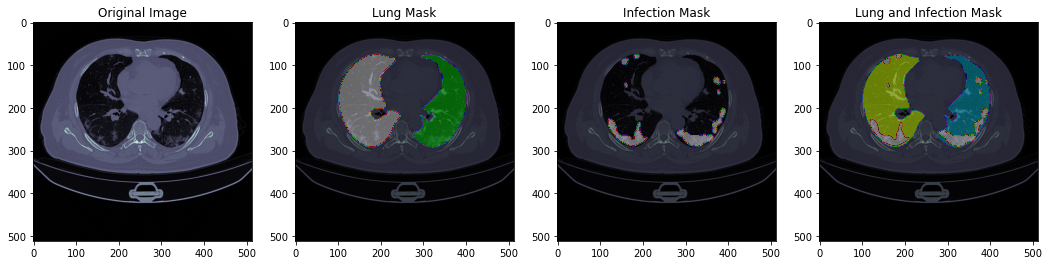

In [16]:
# Examine multiple slices of a ct scan and its annotations
bulk_plot_sample([sample_ct, sample_lung, sample_infe, sample_all], index_list=[100,110,120,130,140,150])